# Time series

Basic concepts:

| Term | Definition |
| - | - |
| Time series | Any data that are indexed by time. |
| Forecasting | Predicting the values for data points with the future time (i.e. time that hasn't been seen at training). |

# Components




Main components of time series:
- **Level**
  - ❌ Not considered a main component of time series
  - Basically horisontal lines at different levels; that is to say, if a time series had no trend, seasonality, or cyclical components, it would essentially be a horisontal line at a certain level (not considering the noise);
  - For instance, this is what Naive Method or Simple Exponential Smoothing do - just do a horisontal line at a determined level.
- **Trend (T)**
  - Tendency of data to show long-term upward or downward movement of data
- **Seasonality (S)**
  - Repetitive upward and downward movements from the trend that occurs within calendar year at fixed interval where periodicity is constant
  - Examples: festivals, customs within the societies; sales of ice cream are higher in summer and lower in winter.
- **Cyclical**
  - Fluctuation around the trend line at random interval where periodicity is not constant 
  - Examples: macro-economic changes cause recession, unemployment, etc.
- **Irregular component (R)**
  - a.k.a. residual / remainder
  - White noise or random uncorrelated changes that follows normal distribution

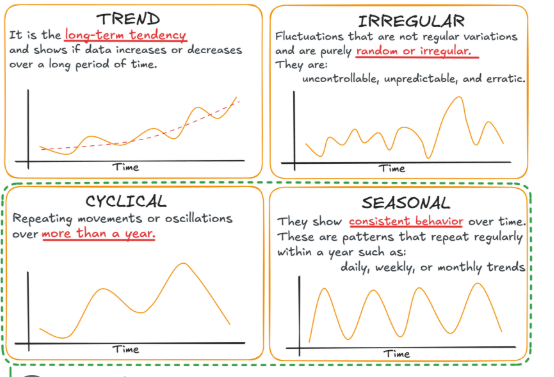


## Seasonality

The easiest way to deal with seasonality is to remove it and make our time series stationary, which is a requirement by most forecasting models. However, there are models such as SARIMA that model the seasonal effects for you.

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


Text(0.5, 1.0, 'Airline Passengers')

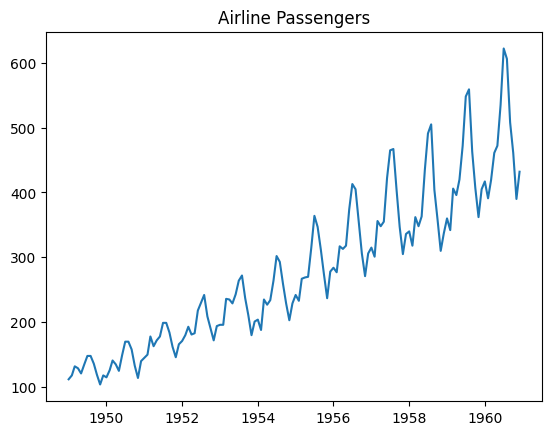

In [2]:
# viewing seasonality
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np

from utils.time_series import get_data_air_passengers


data = get_data_air_passengers()

display(data.head(3))
plt.plot(
    data['Month'],
    data['#Passengers']
)
plt.title('Airline Passengers')


This looks pretty good. We have no obvious seasonality as before.

Text(0.5, 1.0, 'Airline Passengers')

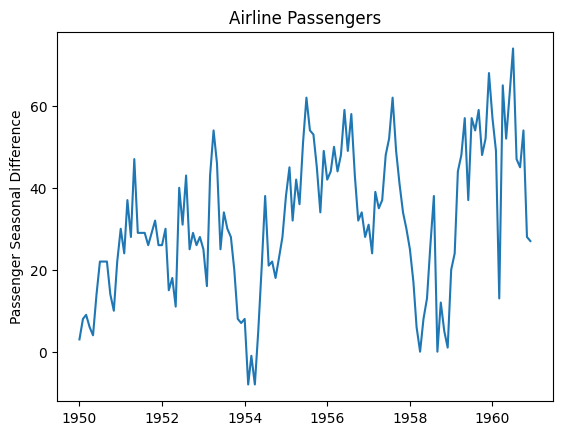

In [3]:
# removing seasonality
data['Passenger_season_diff'] = data['#Passengers'].diff(periods=12)
plt.plot(
    data['Month'],
    data['Passenger_season_diff']
)
plt.ylabel('Passenger Seasonal Difference')
plt.title('Airline Passengers')


To further confirm this, let's check if this data is stationary now. Since p-value < 0.05, we can reject the null hypothesis that the data is non-stationary, thus suggesting that the time series is stationary.

In [7]:
def adf_test(series):
    test_results = adfuller(series)
    print(f"ADF Statistic: {test_results[0]}")
    print(f"P-value: {test_results[1]}")
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print(f" > {thres}: {adf_stat}")

adf_test(data[~data['Passenger_season_diff'].isna()][['Passenger_season_diff']])

ADF Statistic: -3.383020726492481
P-value: 0.011551493085514954
Critical Values:
 > 1%: -3.4816817173418295
 > 5%: -2.8840418343195267
 > 10%: -2.578770059171598


# Types of components summing

Time-series are generally of two types:
- **Additive time series**: 
  - Components (trend, seasonality, noise) are added to generate time series:
  - $Y = T + S + R$
- **Multiplicative time series**: 
  - Components are multiplied to generate time series. One can notice an increase in the amplitude of seasonality in multiplicative time series
  - So if you have variance increasing over time, it's a multiplicative time series
  - $Y = T*S*R$

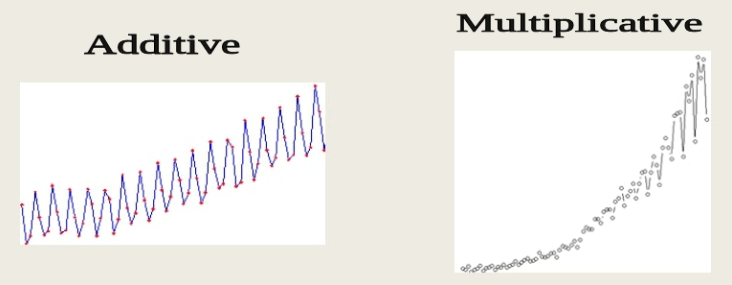

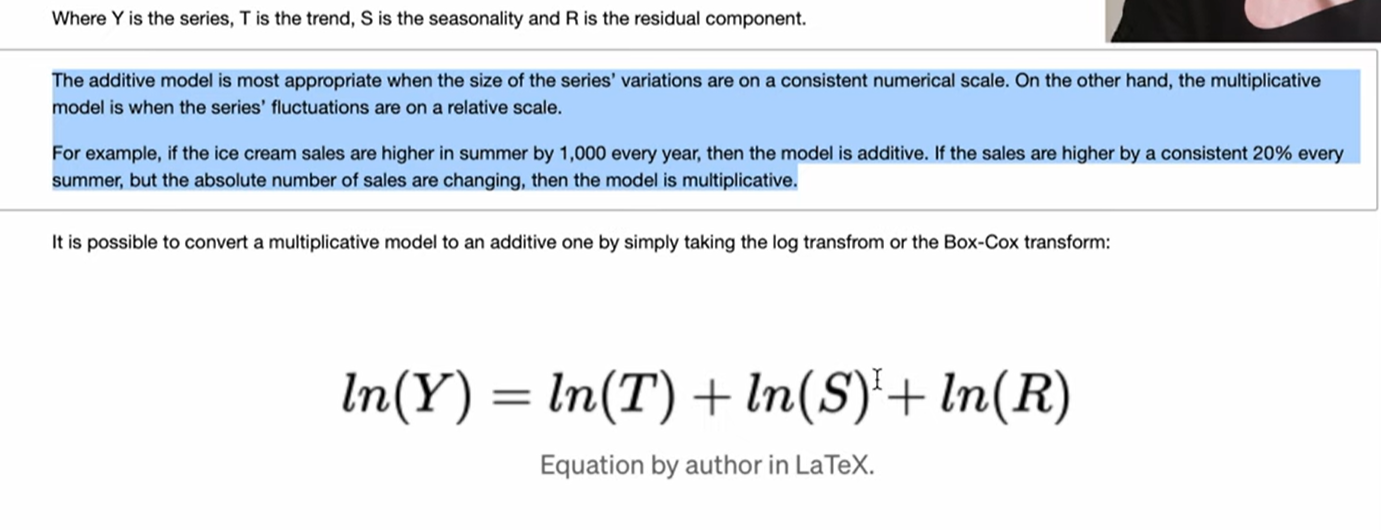


Example of multiplicative time series:

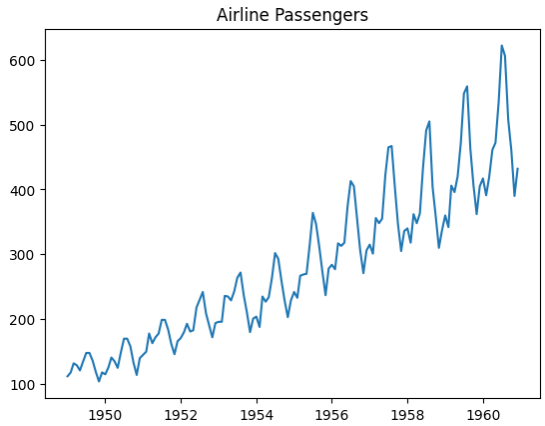



## Decomposition

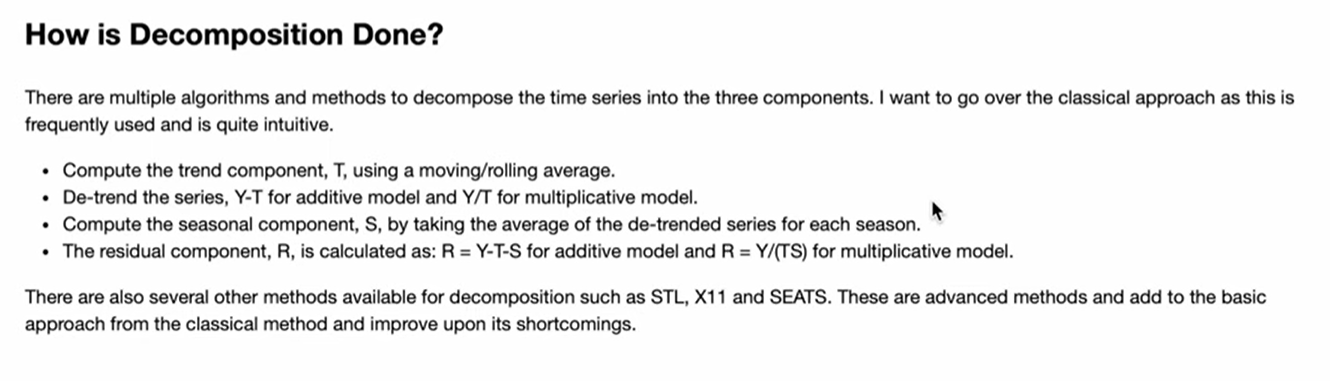

### Example 1

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


2020-01-01     0.149164
2020-02-01     8.439711
2020-03-01    13.842579
Freq: MS, dtype: float64
2028-02-01     88.489167
2028-03-01     91.972069
2028-04-01    100.291326
Freq: MS, dtype: float64


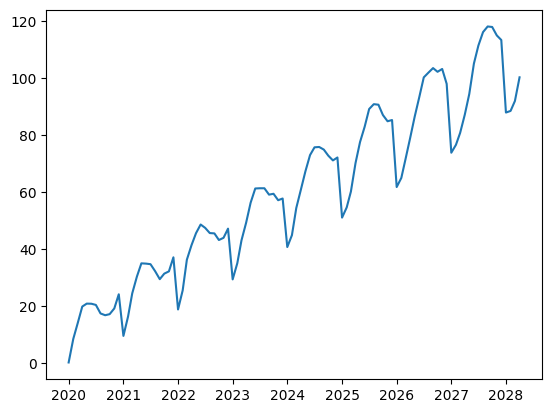

In [9]:
# Create dummy data that has upward trend + seasonality
data = [i + (i%12)*2 + 10*np.sin(i/2) + np.random.randn() for i in range(100)]
index = pd.date_range(start='2020-01-01', periods=100, freq='MS')
time_series = pd.Series(
    data, 
    index=index
)
print(time_series.head(3))
print(time_series.tail(3))
plt.plot(time_series)

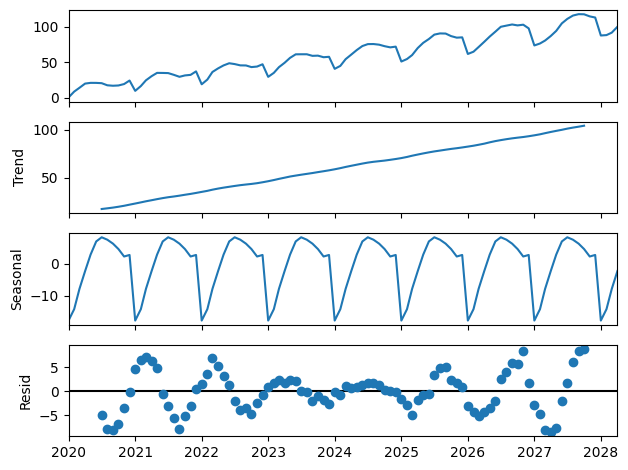

In [10]:
decomposition = seasonal_decompose(time_series, model='additive', period=12)
fig = decomposition.plot()
plt.show()

### Example 2

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


Text(0.5, 1.0, 'Airline Passengers')

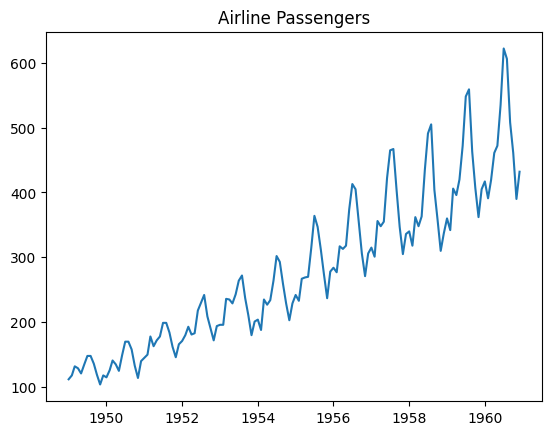

In [15]:
# viewing seasonality
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np

from utils.time_series import get_data_air_passengers

data = get_data_air_passengers()
data = data.set_index('Month')
display(data.head(3))
plt.plot(
    data
)
plt.title('Airline Passengers')



Above, we see that the time series looks multiplicative, as variance increases over time.

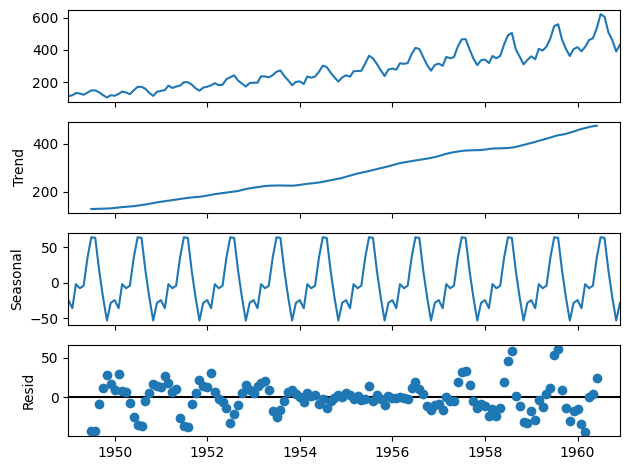

In [17]:
decomposition = seasonal_decompose(data, model='additive', period=12)
fig = decomposition.plot()
plt.show()

Notice how multiplicative seasonal decompose has captured the three components much better than the additive seasonal decompose. 

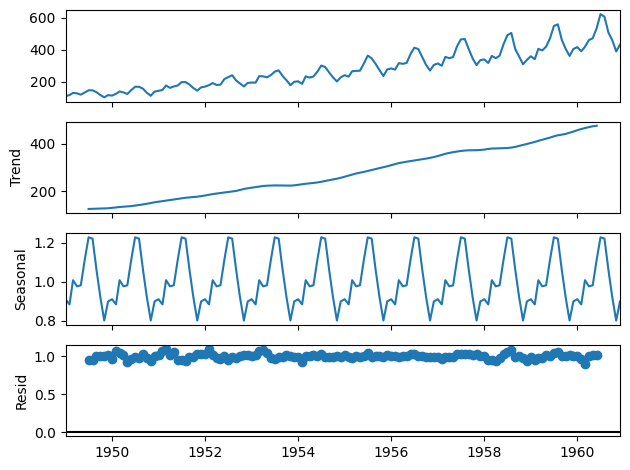

In [18]:
decomposition = seasonal_decompose(data, model='multiplicative', period=12)
fig = decomposition.plot()
plt.show()

We can also convert our time series to an additive model by stabilising the variance using Box-Cox transform by applying the function:

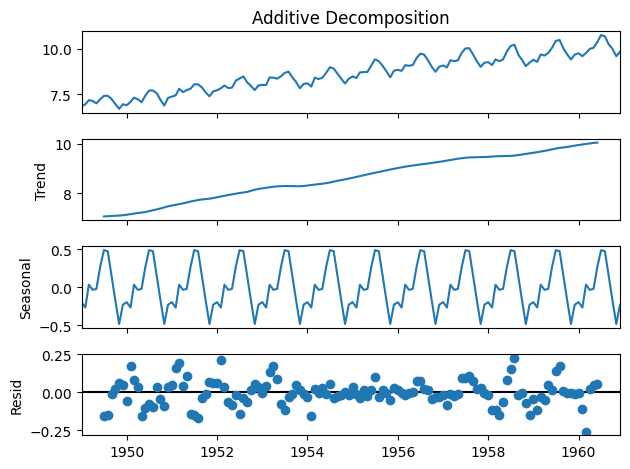

In [19]:
from scipy.stats import boxcox

# Apply boxcox to acquire additive model
data['Additive Decomposition'], lam = boxcox(data['#Passengers'])
# Plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(
    data['Additive Decomposition'],
    model = 'additive'
)
fig = decomposition_plot_add.plot()
plt.show()

Again, the function seems to have captured the three components well.

# Stationarity

Time series can be stationary and non-stationary.

Achieve stationarity: 
- Visual inspection to check
- Statistical tests: Augmented Dickey-Fuller (ADF) 
- Transformations: applying mathematical transformations like differencing (subtracting consecutive values) or log transformations to remove trends and stabilise variance.


## Stationary

Time series are stationary if their statistical properties (mean, variance, and autocorrelation) do not vary over time. 
- In simple terms, it looks the same regardless of when you observe it.
- A time series is stationary if it does not exhibit any long term trends or obvious seasonality. It has a constant variance and mean through time, and the statistical properties of the time series do not change. 
- Examples: 
  - White noise: a series where each value is a random number, independent of past values; 
  - Cyclic behaviour (if cycles are not fixed length): a series with repeating patterns, but the length of the cycles is not fixed 


## Non-stationary

**Non-stationary**
- Examples:
  - Time series with trends: a series where the mean is constantly increasing or decreasing over time
  - Time series with seasonality: a series with repeating patterns over fixed time intervals (e.g. sales data that spikes every December)

Below you can see an example of a time series that is not stationary, as it has **increasing trend** and it looks multiplicative (it's **variance is increasing**). 

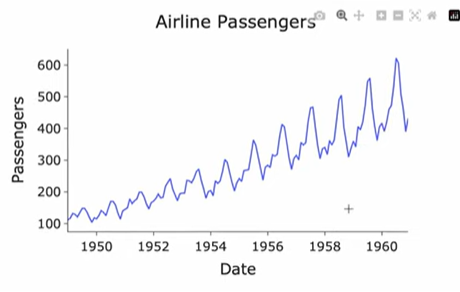


## Stationarity test

**Augmented Dickey-Fuller (ADF)**

Test whether a time series is seasonal or not.
- H0: the time series has a unit root, indicating it is non-stationary
- Ha: the time series is stationary
- p-value < 0.05 : reject the H0 -> this suggests that the time series is stationary. 
- p_value > 0.05 ; fail to reject the H0 -> the time series is non-stationary

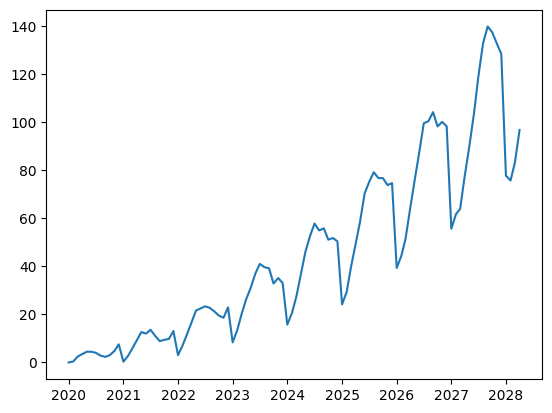

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create dummy data that has upward trend + seasonality
data = [i + (i%12)*2 + 10*np.sin(i/2) + np.random.randn()  for i in range(100)]
data = [i*(i-i*0.99) for i in data]
index = pd.date_range(start='2020-01-01', periods=100, freq='MS')
time_series = pd.Series(
    data, 
    index=index
)
# display(time_series)
plt.plot(time_series)



In [ ]:
def adf_test(series):
    test_results = adfuller(series)
    print(f"ADF Statistic: {test_results[0]}")
    print(f"P-value: {test_results[1]}")
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print(f" > {thres}: {adf_stat}")

adf_test(time_series)


ADF Statistic: 6.027643723712469
P-value: 1.0
Critical Values:
 > 1%: -3.5078527246648834
 > 5%: -2.895382030636155
 > 10%: -2.584823877658872


# Metrics

Some metrics you can use for calculating error (coming from regression):
- MAE
- MSE
- RMSE

Some metrics are forecasting-specific:
- MAPE (percentage difference)
- SMAPE
- MSLE


## MAPE

MAPE (Mean Absolute Percentage Error)

$$
\text{MAPE} = \cfrac{1}{n} \sum\limits^{n}_{i=1} \left( 100 * \cfrac{|y_{i} - \hat{y_{i}}|}{y_{i}} \right)
$$


Advantages:
- Easy to interpret as percentage
- Scale independent

Disadvantages:
- Infinite error if the actual value is near zero
- Biased to under-forecast


## SMAPE

SMAPE (Symmetric MAPE).

$$
\text{SMAPE} = \cfrac{1}{n} \sum\limits^{n}_{i=1} \left( 200 * \cfrac{|y_{i} - \hat{y_{i}}|}{|y_{i}| + |\hat{y_{i}}|} \right)
$$

Advantages:
- No longer favours under forecasting

Disadvantages:
- Infinite error if the actual value is near zero
- Hard to interpret
- Not actually symmetric

## MSLE

MSLE (Mean Squared Logarithm Error) - measures the ratio of the relative difference.

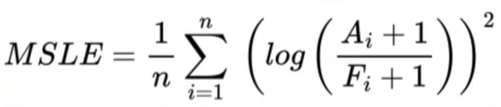




Advantages:
- Punishes under-forecasting

Disadvantages:
- Dividing by values that are close to zero
- Hard to interpret


# Transformations

Transformations:
- Difference
- Logarithm
- Box-Cox


## Example

First, let's get the time series data. Below, we can see that the time series is not stationary, as it has a clear trend and seasonal components. 

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


Text(0.5, 1.0, 'Airline Passengers')

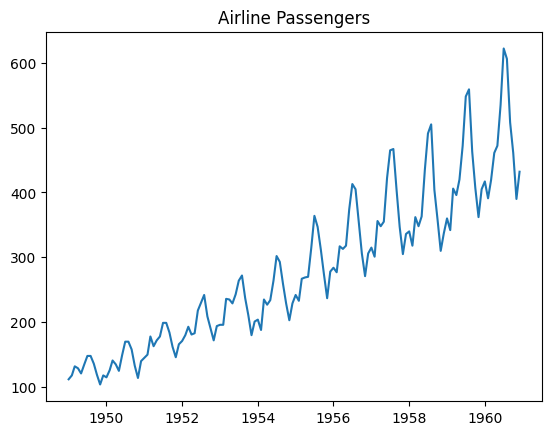

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.time_series import get_data_air_passengers
from statsmodels.tsa.stattools import adfuller

data = get_data_air_passengers()

display(data.head(3))
plt.plot(
    data['Month'],
    data['#Passengers']
)
plt.title('Airline Passengers')


This is not-stationary data also per the Augmented Dickey-Fuller statistical test:

In [22]:
def adf_test(series0):
    series = series0.copy(deep = True)
    series = series.set_index('Month')
    test_results = adfuller(series)
    print(f"ADF Statistic: {test_results[0]}")
    print(f"P-value: {test_results[1]}")
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print(f" > {thres}: {adf_stat}")

adf_test(data)

ADF Statistic: 0.8153688792060482
P-value: 0.991880243437641
Critical Values:
 > 1%: -3.4816817173418295
 > 5%: -2.8840418343195267
 > 10%: -2.578770059171598


**Differencing**

- $d(t)$ is the difference at time $t$ between the series at points $y(t)$ and $y(t-1)$.
- Removes trends / stabilises the mean (the mean is the same)

Differencing for previous day.
$$
d(t) = y(t) - y(t-1)
$$

Differencing for $m$ months before (e.g. m = 12 is for yearly seasonality)
$$
d(t) = y(t) - y(t - m)
$$


So we have applied the differencing transform to the time series, and now there is no trend - the mean is constant. 

However, the data is still not stationary, as the variance still changes.

,Month,#Passengers,Passenger_diff
0,1949-01-01,112,NaN
1,1949-02-01,118,6.0
2,1949-03-01,132,14.0


,Month,#Passengers,Passenger_diff
0,1949-01-01,112,NaN
1,1949-02-01,118,6.0
2,1949-03-01,132,14.0
3,1949-04-01,129,-3.0


Text(0.5, 1.0, 'Airline Passengers')

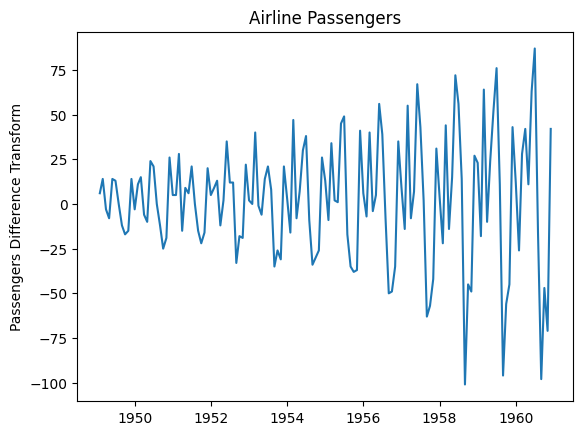

In [26]:
display(data.head(3))
data['Passenger_diff'] = data['#Passengers'].diff()
display(data.head(4))

plt.plot(
    data['Month'],
    data['Passenger_diff']
)
plt.ylabel('Passengers Difference Transform')
plt.title('Airline Passengers')


**Logarithm transform**
- Stabilises the variance
- Importantly, it assumes that your original time series follows an exponential trend.


Having applied the logarithm transform (by itself), we have removed the fluctuating variance, however, the trend persists, and therefore the data is not stationary. 

Text(0.5, 1.0, 'Airline Passengers')

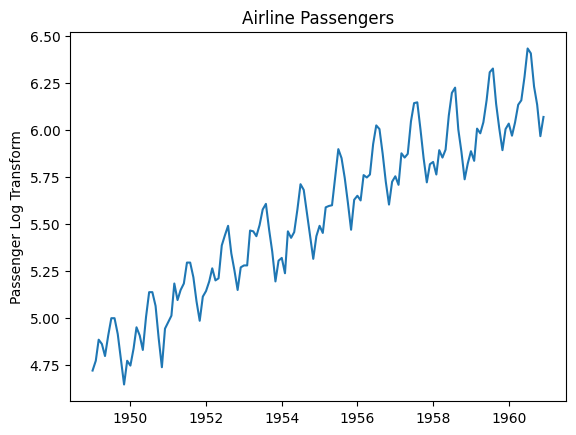

In [27]:
data['Passenger_log'] = np.log(data['#Passengers'])
plt.plot(
    data['Month'],
    data['Passenger_log']
)
plt.ylabel('Passenger Log Transform')
plt.title('Airline Passengers')


Applying logarithm transform and then difference transform, together. We can see that now data looks stationary, because the mean and variance are constant. 

Text(0.5, 1.0, 'Airline Passengers')

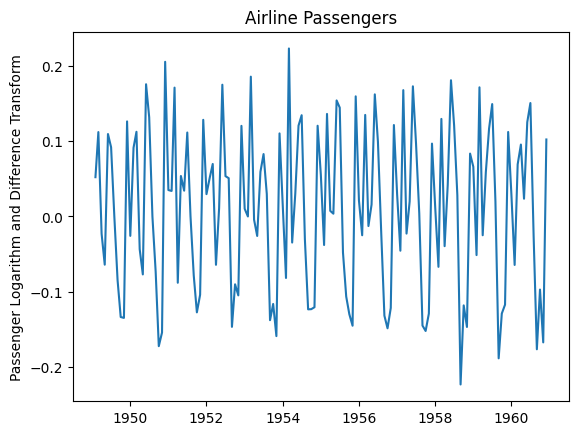

In [29]:
# First, apply the Logarithm transform
data['Passenger_log'] = np.log(data['#Passengers'])
# Then, apply the Difference transform to that Logarithm-transformed data. 
# Note that if you do it the other way around, it won't work!
data['Passenger_log_diff'] = data['Passenger_log'].diff()

plt.plot(
    data['Month'],
    data['Passenger_log_diff']
)
plt.ylabel('Passenger Logarithm and Difference Transform')
plt.title('Airline Passengers')


Now, running this through the test again, we can see that the p-value has reduced a lot!

In [32]:
def adf_test(series0):
    series = series0.copy(deep = True)
    series = series.set_index('Month')
    test_results = adfuller(series)
    print(f"ADF Statistic: {test_results[0]}")
    print(f"P-value: {test_results[1]}")
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print(f" > {thres}: {adf_stat}")

data_cols = data[['Month', 'Passenger_log_diff']]
adf_test(data_cols[1:])

ADF Statistic: -2.717130598388133
P-value: 0.07112054815085875
Critical Values:
 > 1%: -3.4825006939887997
 > 5%: -2.884397984161377
 > 10%: -2.578960197753906


## Box-Cox Transform

The Box-Cox transforms non-normal data to normal distribution-like data.

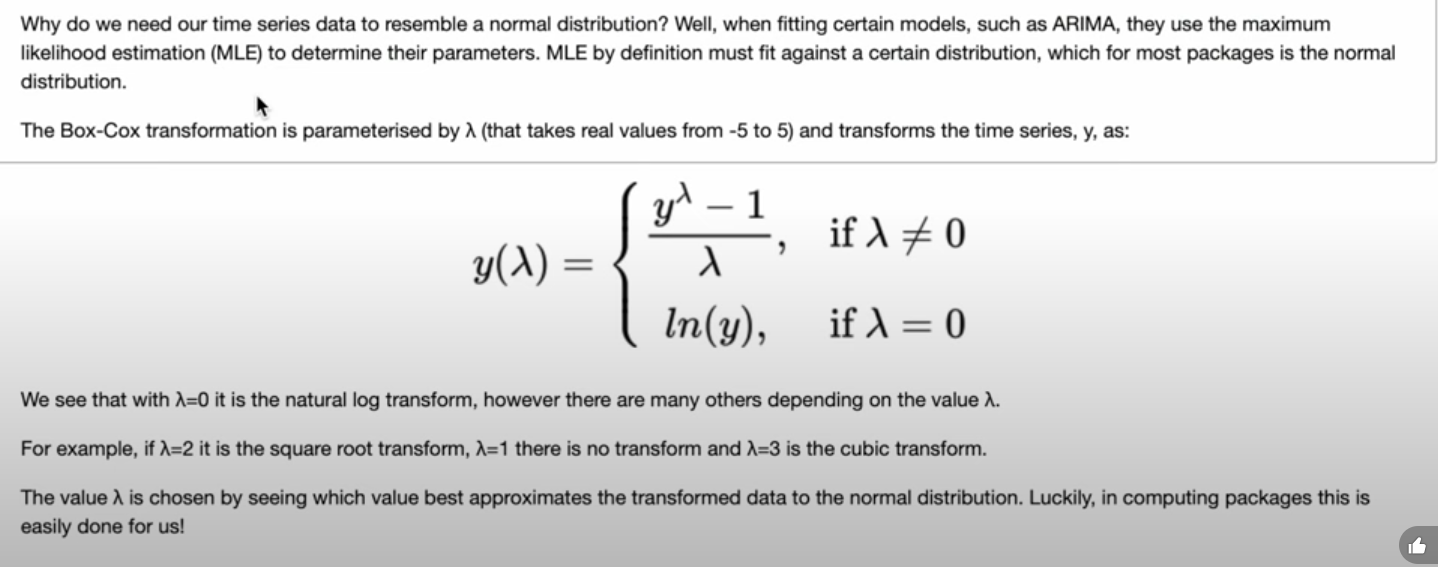

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


Text(0.5, 1.0, 'Airline Passengers')

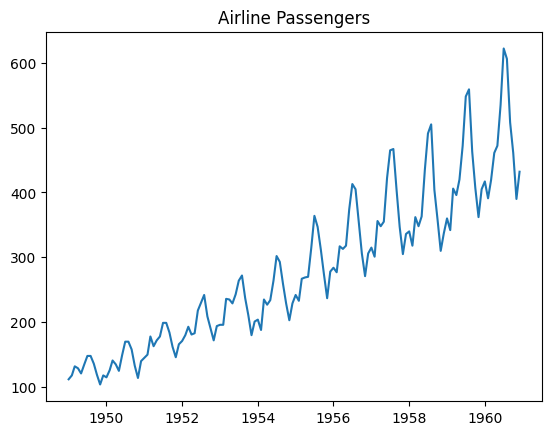

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

from utils.time_series import get_data_air_passengers


data = get_data_air_passengers()

display(data.head(3))
plt.plot(
    data['Month'],
    data['#Passengers']
)
plt.title('Airline Passengers')


Now let's apply the box-cox transform. As you see, it makes the variance stable and makes fluctuations consistent. The optimal lambda value is 0.148, which is a near perfect natural logarithmic transform but not quite. 

Lambda: 0.148


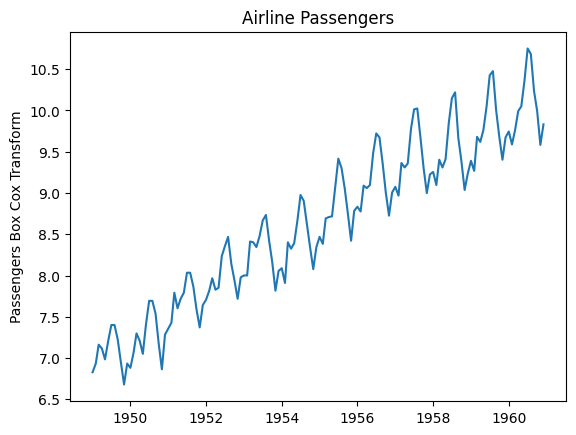

In [37]:
# Apply box-cox transform and plot it
data['Passengers_box_cox'], lam = boxcox(data['#Passengers'])

plt.plot(
    data['Month'],
    data['Passengers_box_cox']
)
plt.ylabel('Passengers Box Cox Transform')
plt.title('Airline Passengers')
print(f"Lambda: {lam:.3f}")


# Models

Types of time series forecasting models.


## Statistical Models

- **Naive Methods**:
  - Forecast = last observed value (or seasonal equivalent)
- **Moving Average (MA)**
  - Forecast is the average of the last n observations
- **Exponential Smoothing**
  - Gives more weight to more recent data by assigning exponentially decreasing weights to older observations, giving more weight to recent data
  - Includes:
    - **Simple Exponential Smoothing**: 
      - Just forecasts the level of the time series; 
      - Does NOT take into account trend or seasonality;
    - **Holt's Linear Trend Method**:
      - a.k.a. double exponential smoothing
      - Incorporates the trend as well as the level
    - **Holt-Winters Method**
      - a.k.a. triple exponential smoothing; it's the best Exponential Smoothing model.
      - Adds seasonality)
- **ARIMA (Autoregressive Integrated Moving Average)**
  - A versatile model that captures autoregressive, integrated, and moving average components of a time series.
  - Combines autoregression (AR), differencing (I), and moving average (MA).
  - Good for non-seasonal data.
- **SARIMA (Seasonal ARIMA)**
  - An extension of ARIMA that incorporates seasonal components
  - Can be used for seasonal data
- **SARIMAX (Seasonal ARIMA with Exogenous Regressors)**
  - Extends SARIMA, accounts for seasonality and external factors. Can accommodate both autoregressive and moving average components; 

### Basic forecasting methods

144


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Text(0.5, 1.0, 'Time series data')

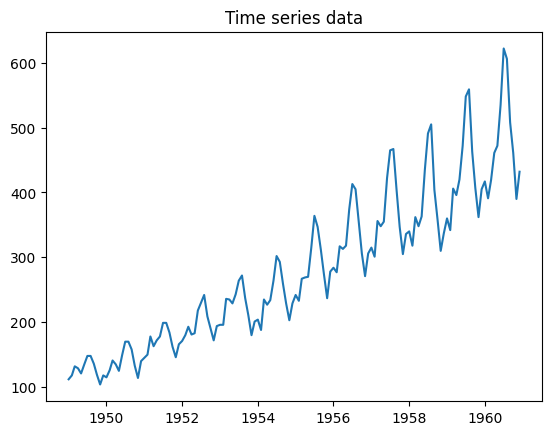

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv('my_datasets/time-series/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
print(len(df))
display(df.head())
# Plot the initial data
plt.plot(
    df['Month'],
    df['#Passengers']
)
plt.title('Time series data')

In [94]:
# Split train and test
def train_test_split(df):
    num_train_split = int(len(df) * 0.8)
    df_train = df.iloc[:num_train_split]
    df_test = df.iloc[num_train_split:]
    return df_train, df_test

df_train, df_test = train_test_split(df)
print(f"""
Total data points: {len(df)}
> Train: {len(df_train)}
> Test: {len(df_test)}
""")



Total data points: 144
> Train: 115
> Test: 29



In [95]:
def plot_predictions(
    df_train: pd.DataFrame,
    df_test: pd.DataFrame,
    df_predictions: pd.DataFrame,
    title: str
):
    """Plot."""
    train, test, predictions = df_train.copy(deep=True), df_test.copy(deep=True), df_predictions.copy(deep=True)
    train['data split'] = 'Train'
    test['data split'] = 'Test'
    predictions['data split'] = 'Prediction'
    sns.lineplot(
        data = pd.concat([train, test, predictions]),
        x = 'Month',
        y = '#Passengers',
        hue = 'data split'
    )
    plt.title(title)
    plt.show()
    return None


**Average forecast**

This model simply assumes that all future values are equal to the mean of all the previous observations.

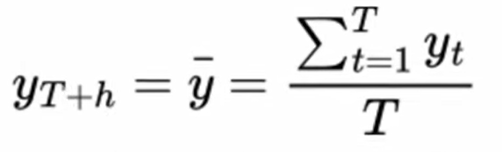

,Month,#Passengers
115,1958-08-01,239.947826
116,1958-09-01,239.947826
117,1958-10-01,239.947826


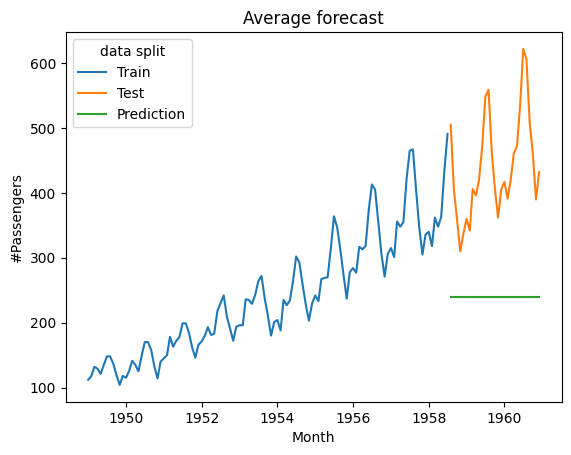

In [ ]:
df_train, df_test = train_test_split(df)

average_forecast = df_train['#Passengers'].mean()
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = average_forecast
display(df_predictions.head(3))

plot_predictions(
    df_train,
    df_test,
    df_predictions,
    'Average forecast'
)


**Naive forecast**

Setting the future forecast equal to the latest observed value.

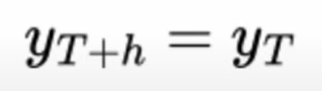

,Month,#Passengers
115,1958-08-01,491
116,1958-09-01,491
117,1958-10-01,491


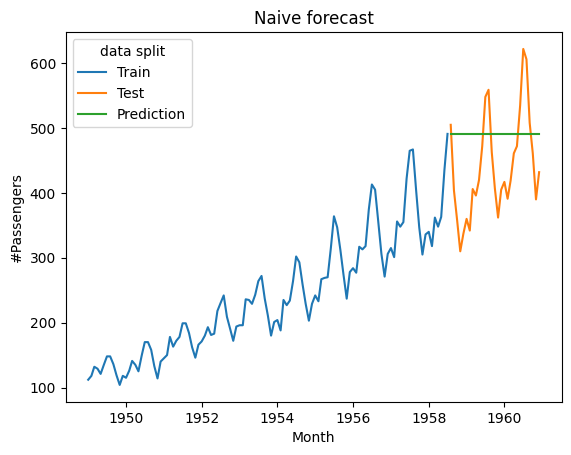

In [ ]:
df_train, df_test = train_test_split(df)

naive_forecast = df_train['#Passengers'].iloc[-1] # 114 \ 1958-07-01 \ 491
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = naive_forecast
display(df_predictions.head(3))

plot_predictions(
    df_train,
    df_test,
    df_predictions,
    'Naive forecast'
)


**Seasonal naive forecast**

Take the latest-available data from the train data but m months back.
Can be:
- m = 12: 12 months back
- m = 4: a quarter back
- m = 52: weekly data
Take the previous month from train data.

Can capture seasonality, but not the trend.

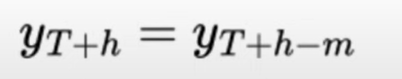

In [ ]:
df_train, df_test = train_test_split(df)

In [100]:
# Proc df_train_lag
df_train = df_train.copy(deep=True)
df_train['month_day'] = df_train['Month'].dt.month
df_train


,Month,#Passengers,month_day
0,1949-01-01,112,1
1,1949-02-01,118,2
2,1949-03-01,132,3
3,1949-04-01,129,4
4,1949-05-01,121,5
...,...,...,...
110,1958-03-01,362,3
111,1958-04-01,348,4
112,1958-05-01,363,5
113,1958-06-01,435,6


In [106]:
df_train.query("month_day == 1")['#Passengers'].iloc[-1]

340

In [111]:
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['month_day'] = df_predictions['Month'].dt.month

def get_train_month(x):
    return df_train.query(f"month_day == {x}")['#Passengers'].iloc[-1]

df_predictions['#Passengers'] = df_predictions['month_day'].apply(
    lambda x: get_train_month(x)
)
df_predictions = df_predictions.drop(['month_day'], axis=1)
df_predictions

,Month,#Passengers
115,1958-08-01,467
116,1958-09-01,404
117,1958-10-01,347
118,1958-11-01,305
119,1958-12-01,336
120,1959-01-01,340
121,1959-02-01,318
122,1959-03-01,362
123,1959-04-01,348
124,1959-05-01,363


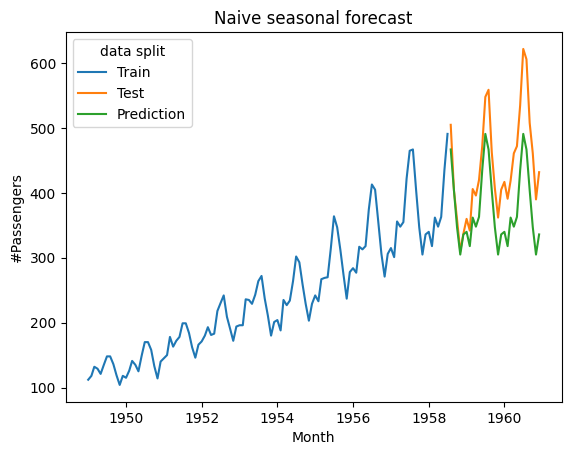

In [112]:
plot_predictions(
    df_train,
    df_test,
    df_predictions,
    'Naive seasonal forecast'
)

**Drift forecast model**

- It's an extension of the naive forecast
- so the basic idea is drawing a straight line from the first to last point and extending it forwards through time

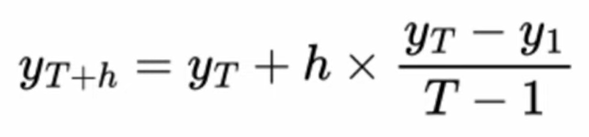


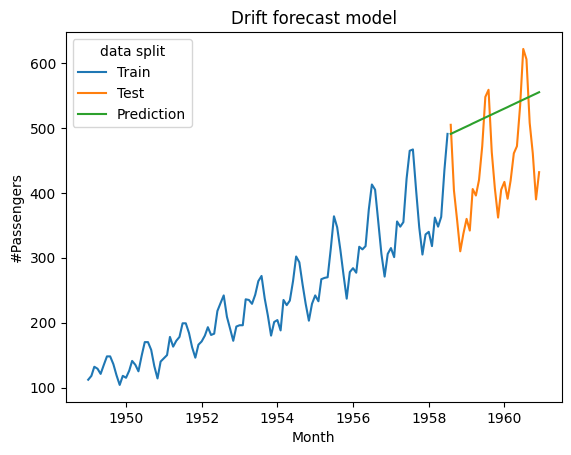

In [ ]:
df_train, df_test = train_test_split(df)
constant = (
    df_train['#Passengers'].iloc[-1] - \
    df_train['#Passengers'].iloc[0]
) / len(df_train) - 1
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['h'] = range(len(df_predictions))
df_predictions['#Passengers'] = df_train['#Passengers'].iloc[-1] + df_predictions['h'] * constant
plot_predictions(
    df_train,
    df_test,
    df_predictions,
    'Drift forecast model'
)

### Simple Exponential Smoothing

It's simple because it doesn't take into account trend or seasonality, iow, it's a horisontal line. 

$\alpha$ - smoothing parameter; $0 \le \alpha \le 1$

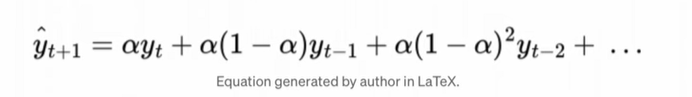

Notice that if $\alpha = 1$, it converts into naive forecast model.

144


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121



Total data points: 144
> Train: 115
> Test: 29



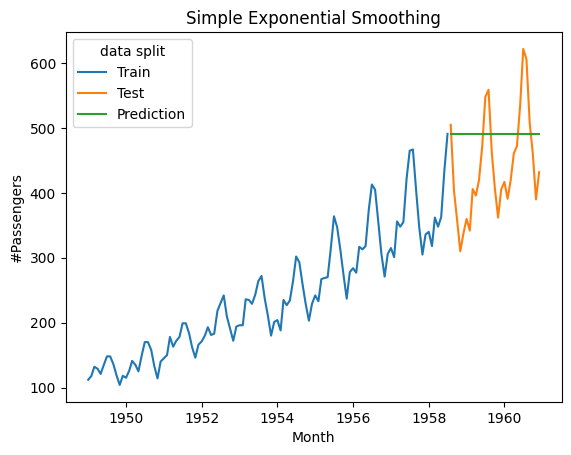

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from importlib import reload

from utils.time_series import plot_predictions

# Read data
df = pd.read_csv('my_datasets/time-series/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
print(len(df))
display(df.head())

# Split train and test
def train_test_split(df):
    num_train_split = int(len(df) * 0.8)
    df_train = df.iloc[:num_train_split]
    df_test = df.iloc[num_train_split:]
    return df_train, df_test

df_train, df_test = train_test_split(df)
print(f"""
Total data points: {len(df)}
> Train: {len(df_train)}
> Test: {len(df_test)}
""")

# Fit model
model = SimpleExpSmoothing(df_train['#Passengers']).fit(optimized=True)
forecasts = model.forecast(len(df_test))
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Simple Exponential Smoothing'
)

In [9]:
# Notice that smoothing_level (alpha) = 1, meaning that the best model fitted to this data
# (according to auto-determine) is naive model!
model.summary()

Dep. Variable:,#Passengers,No. Observations:,115
Model:,SimpleExpSmoothing,SSE,82599.001
Optimized:,True,AIC,760.334
Trend:,None,BIC,765.824
Seasonal:,None,AICC,760.698
Seasonal Periods:,None,Date:,"Fri, 17 Oct 2025"
Box-Cox:,False,Time:,20:24:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,112.00000,l.0,False


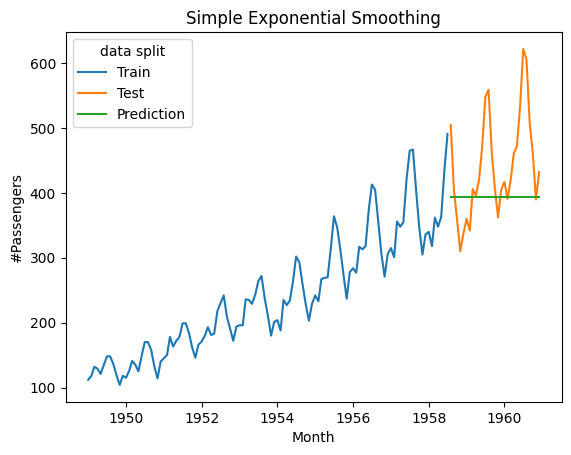

In [3]:
# We can also manually set an alpha
model = SimpleExpSmoothing(df_train['#Passengers']).fit(
    smoothing_level=0.2,
    optimized=False
)
forecasts = model.forecast(len(df_test))
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Simple Exponential Smoothing'
)

### Holt's Linear Model

1957, Charles Holt extended the Simple Exponential Smoothing model to include a trend component, $b_{t}$.

On top of Simple Exponential Smoothing's level, also incorporates trend.

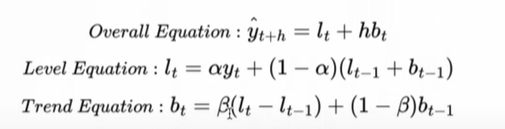

$\beta$ - trend smoothing factor; $0 \le \beta \le 1$

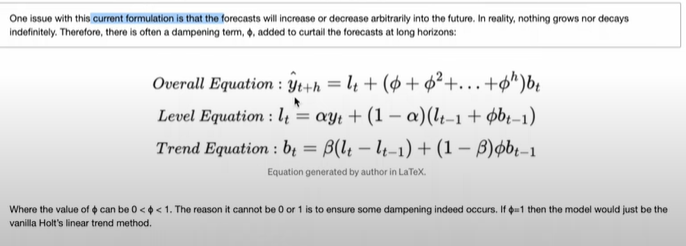


144


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121



Total data points: 144
> Train: 100
> Test: 44



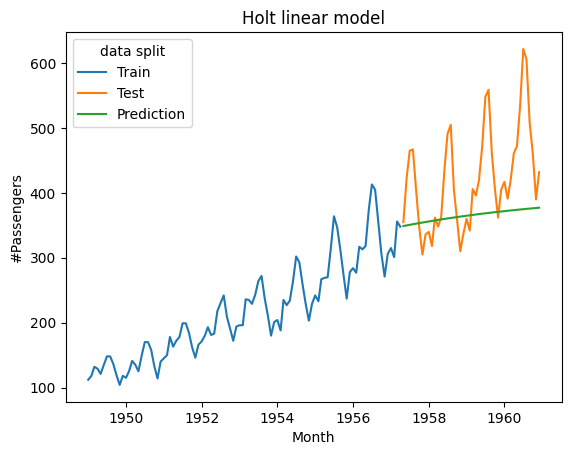

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import Holt
from importlib import reload

from utils.time_series import plot_predictions

# Read data
df = pd.read_csv('my_datasets/time-series/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
print(len(df))
display(df.head())

# Split train and test
def train_test_split(df):
    num_train_split = int(len(df) * 0.7)
    df_train = df.iloc[:num_train_split]
    df_test = df.iloc[num_train_split:]
    return df_train, df_test

df_train, df_test = train_test_split(df)
print(f"""
Total data points: {len(df)}
> Train: {len(df_train)}
> Test: {len(df_test)}
""")

# Fit model
model = Holt(
    df_train['#Passengers'],
    # exponential = True,
    damped_trend = True
    ).fit(optimized=True)
forecasts = model.forecast(len(df_test))
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Holt linear model'
)

In [4]:
model.summary()

Dep. Variable:,#Passengers,No. Observations:,115
Model:,Holt,SSE,81899.578
Optimized:,True,AIC,765.356
Trend:,Additive,BIC,779.081
Seasonal:,None,AICC,766.403
Seasonal Periods:,None,Date:,"Fri, 17 Oct 2025"
Box-Cox:,False,Time:,23:49:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


### Holt-Winters Model

Holt-Winters model further extends Holt's linear trend model by adding seasonality to the forecast.

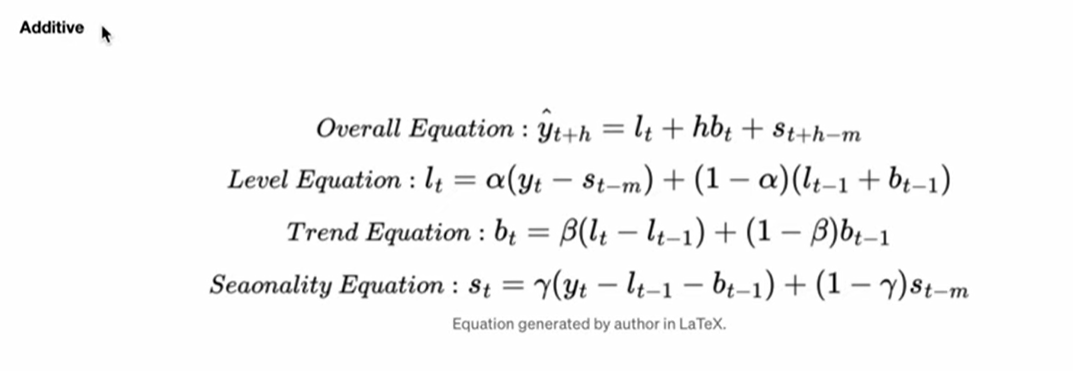

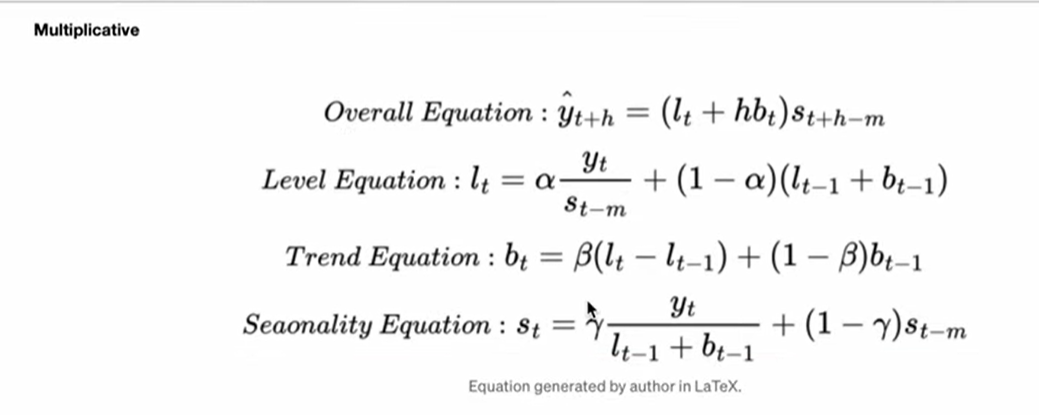



#### Simple example

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from importlib import reload

from utils.time_series import plot_predictions


In [16]:
# Read data
df = pd.read_csv('my_datasets/time-series/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
print(len(df))
display(df.head())

# Split train and test
def train_test_split(df):
    num_train_split = int(len(df) * 0.7)
    df_train = df.iloc[:num_train_split]
    df_test = df.iloc[num_train_split:]
    return df_train, df_test

df_train, df_test = train_test_split(df)
print(f"""
Total data points: {len(df)}
> Train: {len(df_train)}
> Test: {len(df_test)}
""")


144


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121



Total data points: 144
> Train: 100
> Test: 44



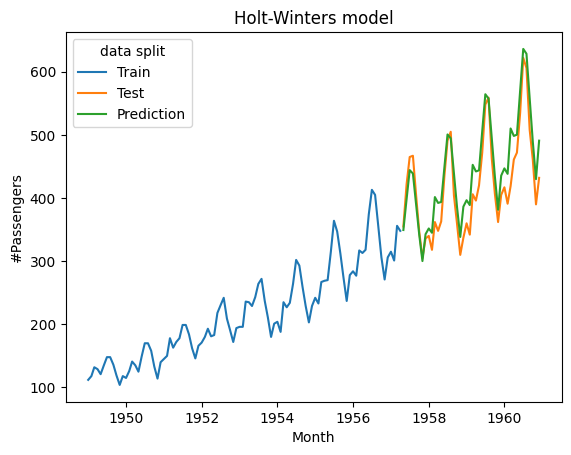

Dep. Variable:,#Passengers,No. Observations:,100
Model:,ExponentialSmoothing,SSE,4843.629
Optimized:,True,AIC,420.025
Trend:,Multiplicative,BIC,461.708
Seasonal:,Multiplicative,AICC,428.469
Seasonal Periods:,12,Date:,"Sat, 25 Oct 2025"
Box-Cox:,False,Time:,20:41:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


In [17]:
# Fit model
model1 = (
    ExponentialSmoothing(
        df_train['#Passengers'],
        trend = 'mul',
        seasonal = 'mul',
        seasonal_periods = 12
    ).fit(
        optimized = True
    )
)

forecasts = model1.forecast(
    len(df_test)
)
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Holt-Winters model'
)
model1.summary()

#### Explore params

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from importlib import reload
from sklearn.metrics import (
    mean_absolute_percentage_error as mape,
    r2_score as r_squared
)

from utils.time_series import plot_predictions


In [95]:
# Read data
df = pd.read_csv('my_datasets/time-series/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
print(len(df))
display(df.head())

# Split train and test
def train_test_split(df):
    num_train_split = int(len(df) * 0.7)
    df_train = df.iloc[:num_train_split]
    df_test = df.iloc[num_train_split:]
    return df_train, df_test

df_train, df_test = train_test_split(df)
print(f"""
Total data points: {len(df)}
> Train: {len(df_train)}
> Test: {len(df_test)}
""")


144


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121



Total data points: 144
> Train: 100
> Test: 44



MAPE = 0.072


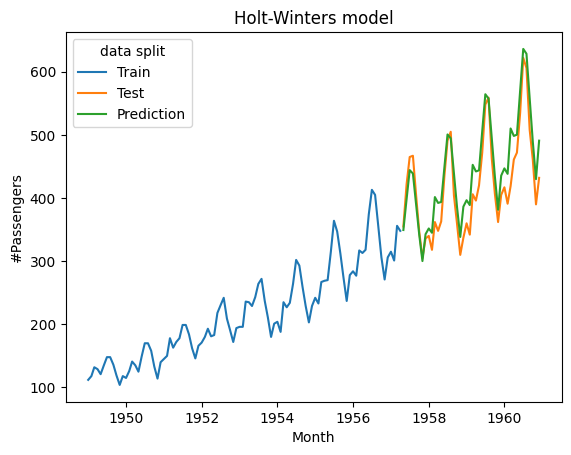

Dep. Variable:,#Passengers,No. Observations:,100
Model:,ExponentialSmoothing,SSE,4843.629
Optimized:,True,AIC,420.025
Trend:,Multiplicative,BIC,461.708
Seasonal:,Multiplicative,AICC,428.469
Seasonal Periods:,12,Date:,"Sat, 25 Oct 2025"
Box-Cox:,False,Time:,22:15:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


In [96]:
# Fit model (baseline)
model1 = (
    ExponentialSmoothing(
        df_train['#Passengers'],
        trend = 'mul',
        seasonal = 'mul',
        seasonal_periods = 12
    ).fit(
        optimized = True
    )
)

forecasts = model1.forecast(
    len(df_test)
)
mape_calc = mape(df_test['#Passengers'].values, forecasts.values)
print(f"MAPE = {mape_calc:.3f}")
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Holt-Winters model'
)
model1.summary()

MAPE = 0.120


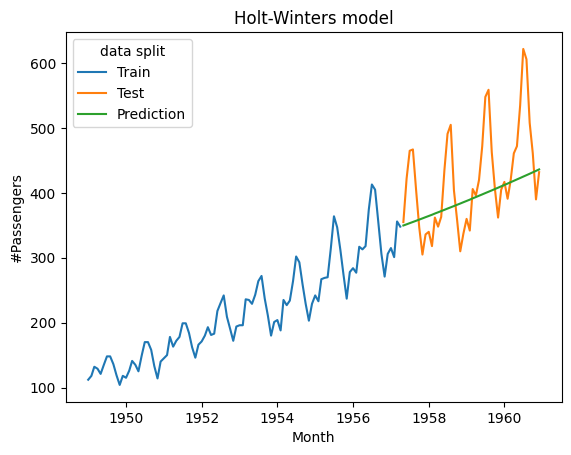

In [97]:
# We can also only learn the trend component
model2 = (
    ExponentialSmoothing(
        df_train['#Passengers'],
        trend = 'mul',
        seasonal = None,
        seasonal_periods = 12
    ).fit(
        optimized = True
    )
)

forecasts = model2.forecast(
    len(df_test)
)
mape_calc = mape(df_test['#Passengers'].values, forecasts.values)
print(f"MAPE = {mape_calc:.3f}")
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Holt-Winters model'
)
# model2.summary()

MAPE = 0.149


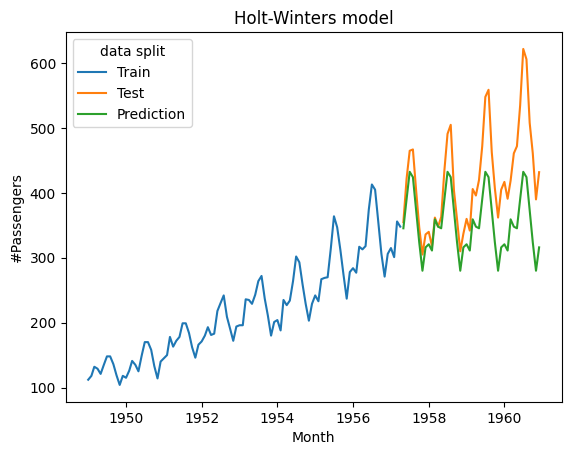

In [98]:
# or only the seasonal component
# We can also only learn the trend component
model3 = (
    ExponentialSmoothing(
        df_train['#Passengers'],
        trend = None,
        seasonal = 'mul',
        seasonal_periods = 12
    ).fit(
        optimized = True
    )
)

forecasts = model3.forecast(
    len(df_test)
)
mape_calc = mape(df_test['#Passengers'].values, forecasts.values)
print(f"MAPE = {mape_calc:.3f}")
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Holt-Winters model'
)

In [99]:
values = np.arange(0, 1.00001, 0.2).tolist()
values = np.arange(0, 1.1, 0.2)
values

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

Model 1 (auto-optimised): MAPE = 0.072


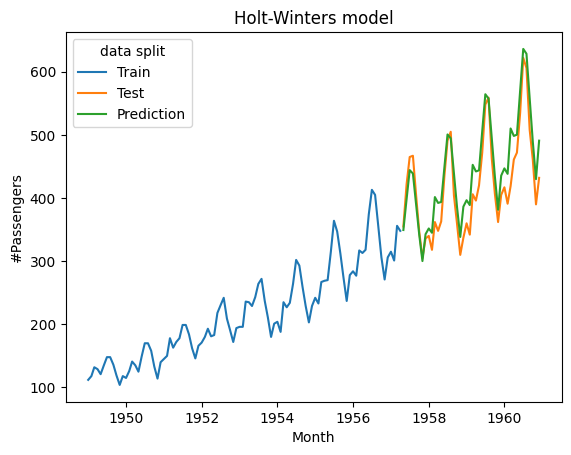

c:\Users\evgen\.conda\envs\data-science-2\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\evgen\.conda\envs\data-science-2\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\evgen\.conda\envs\data-science-2\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\evgen\.conda\envs\data-science-2\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\evgen\.conda\envs\data-science-2\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:85: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\evgen\.conda\envs\data-science-2\Lib\site-packages\statsmo

,alpha,beta,gamma,MAPE,r_squared
0,0.2,1.0,0.8,0.033008,9.508320e-01
1,0.2,0.6,1.0,0.034044,9.463680e-01
2,0.4,1.0,1.0,0.034520,9.480160e-01
3,0.2,0.2,0.4,0.035053,9.432169e-01
4,0.4,0.8,0.2,0.037967,9.320338e-01
...,...,...,...,...,...
211,0.6,1.0,0.8,0.767153,-2.863156e+01
212,0.4,1.0,0.6,0.997557,-5.127820e+01
213,1.0,1.0,1.0,1.000000,-3.033821e+01
214,0.8,1.0,1.0,1.035906,-3.351418e+01


In [101]:
# now let's do grid search for the best parameters

# Fit model (baseline - optimized)
model1 = (
    ExponentialSmoothing(
        df_train['#Passengers'],
        trend = 'mul',
        seasonal = 'mul',
        seasonal_periods = 12
    ).fit(
        optimized = True
    )
)

forecasts = model1.forecast(
    len(df_test)
)
mape_calc = mape(df_test['#Passengers'].values, forecasts.values)
print(f"Model 1 (auto-optimised): MAPE = {mape_calc:.3f}")
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Holt-Winters model'
)
model1.summary()

# Then grid search
grid_search = {
    'alpha': values, # smoothing_level
    'beta': values, # smoothing_trend
    'gamma': values, # smoothing_seasonal
}
output_metrics = {
    'alpha': [],
    'beta': [],
    'gamma': [],
    'MAPE': [], # output MAPE of the model with the specified parameters
    'r_squared': []
}


for alpha in grid_search['alpha']:
    for beta in grid_search['beta']:
        for gamma in grid_search['gamma']:
            model = (
                ExponentialSmoothing(
                    df_train['#Passengers'],
                    trend = 'mul',
                    seasonal = 'mul',
                    seasonal_periods = 12
                ).fit(
                    smoothing_level = alpha,
                    smoothing_trend = beta,
                    smoothing_seasonal = gamma
                )
            )
            forecasts = model.forecast(
                len(df_test)
            )
            mape_calc = mape(df_test['#Passengers'].values, forecasts.values)
            r_squared_calc = r_squared(df_test['#Passengers'].values, forecasts.values)
            output_metrics['alpha'].append(alpha)
            output_metrics['beta'].append(beta)
            output_metrics['gamma'].append(gamma)
            output_metrics['MAPE'].append(mape_calc)
            output_metrics['r_squared'].append(r_squared_calc)

output_metrics = pd.DataFrame(output_metrics).sort_values(by = 'MAPE', ascending = True).reset_index(drop = True)
output_metrics

In [103]:
output_metrics = pd.DataFrame(output_metrics).sort_values(by = 'r_squared', ascending = False).reset_index(drop = True)
output_metrics

,alpha,beta,gamma,MAPE,r_squared
0,0.2,1.0,0.8,0.033008,9.508320e-01
1,0.4,1.0,1.0,0.034520,9.480160e-01
2,0.2,0.6,1.0,0.034044,9.463680e-01
3,0.2,0.2,0.4,0.035053,9.432169e-01
4,0.2,0.4,1.0,0.038340,9.341130e-01
...,...,...,...,...,...
211,0.6,1.0,0.8,0.767153,-2.863156e+01
212,1.0,1.0,1.0,1.000000,-3.033821e+01
213,0.8,1.0,1.0,1.035906,-3.351418e+01
214,0.4,1.0,0.6,0.997557,-5.127820e+01


In [91]:
best_params, worst_params = output_metrics.iloc[0].values.tolist(), output_metrics.iloc[-1].values.tolist()
best_params, worst_params

([0.2, 1.0, 0.8, 0.03300841275755338],
 [1.0, 0.6000000000000001, 1.0, 130.4489014948072])

Model with the best params [0.2, 1.0, 0.8, 0.03300841275755338] : MAPE = 0.033


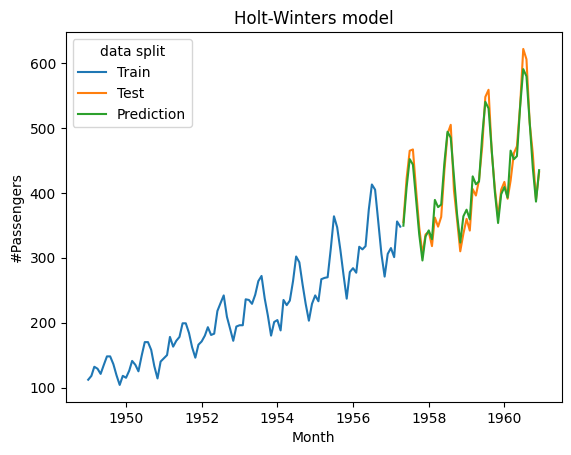

Model with the worst params [1.0, 0.6000000000000001, 1.0, 130.4489014948072] : MAPE = 130.449


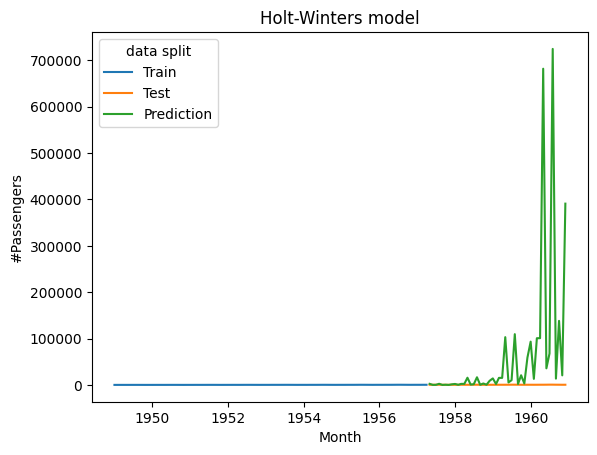

In [93]:
# Now let's check what those models look like

# The best model
model_best = (
    ExponentialSmoothing(
        df_train['#Passengers'],
        trend = 'mul',
        seasonal = 'mul',
        seasonal_periods = 12
    ).fit(
        smoothing_level = best_params[0],
        smoothing_trend = best_params[1],
        smoothing_seasonal = best_params[2]
    )
)

forecasts = model_best.forecast(
    len(df_test)
)
mape_calc = mape(df_test['#Passengers'].values, forecasts.values)
print(f"Model with the best params {best_params} : MAPE = {mape_calc:.3f}")
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Holt-Winters model'
)

# The worst model
model_worst = (
    ExponentialSmoothing(
        df_train['#Passengers'],
        trend = 'mul',
        seasonal = 'mul',
        seasonal_periods = 12
    ).fit(
        smoothing_level = worst_params[0],
        smoothing_trend = worst_params[1],
        smoothing_seasonal = worst_params[2]
    )
)

forecasts = model_worst.forecast(
    len(df_test)
)
mape_calc = mape(df_test['#Passengers'].values, forecasts.values)
print(f"Model with the worst params {worst_params} : MAPE = {mape_calc:.3f}")
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Holt-Winters model'
)

## ML / DL models

- Linear regression
- Random Forest / Gradient Boosting
- Support Vector Regression

- RNNs
- LSTM
- GRU
- TCN
- Transformer-based models

## Hybrid models

Combine statistical and ML/DL models.

Examples:
- ARIMA + XGBoost
- LSTM + Prophet



## Specialised tools

**Specialised tools**

- Facebook's **Prophet**: designed for forecasting time series data with strong seasonality and trend components;
- **NeuralProphet**: combines Prophet with NNs;
- **GluonTS / Darts / Kats**: libraries for advanced time series modeling; 


# Some examples

## Example 1

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

2020-01-01     0.917990
2020-02-01     7.692842
2020-03-01    13.962133
Freq: MS, dtype: float64
2028-02-01    90.434416
2028-03-01    92.742838
2028-04-01    97.843157
Freq: MS, dtype: float64


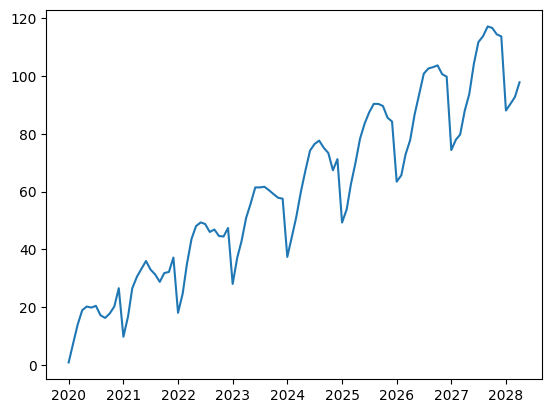

In [89]:
# Create dummy data that has upward trend + seasonality
data = [i + (i%12)*2 + 10*np.sin(i/2) + np.random.randn() for i in range(100)]
index = pd.date_range(start='2020-01-01', periods=100, freq='MS')
time_series = pd.Series(
    data, 
    index=index
)
print(time_series.head(3))
print(time_series.tail(3))
plt.plot(time_series)

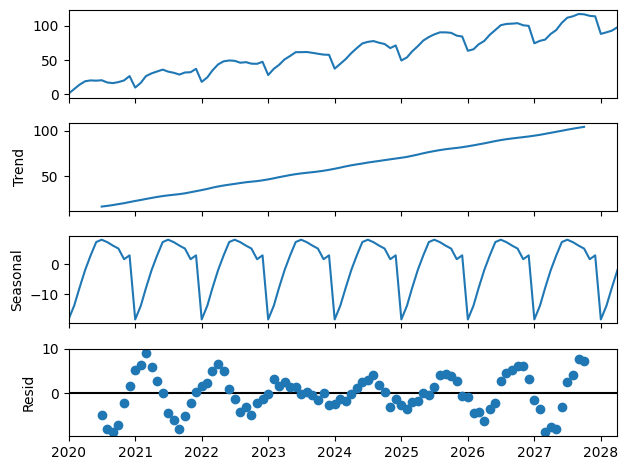

In [90]:
decomposition = seasonal_decompose(time_series, model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [91]:
# Test of Augmented Dickey Fuller:
print(f'T-test: {adfuller(time_series)[0]}')
p_value = adfuller(time_series)[1]
print(f'P-value: {p_value:.3f}')
if p_value < 0.05:
    print(f"> Reject the H0. Time series seems to be stationary.")
else:
    print(f"> Fail to reject the H0. Time series seems to be non-stationary.")

T-test: -0.26846714768815894
P-value: 0.930
> Fail to reject the H0. Time series seems to be non-stationary.


In [ ]:
# Let's separate the data into train and test
train = time_series.loc[
    time_series.index[0] : 
    time_series.index[int(len(time_series)*0.8)]
]

test = time_series.loc[
    time_series.index[int(len(time_series)*0.8)] :
] 

train_start = train.head(1).index[0].strftime("%Y-%m-%d")
train_end   = train.tail(1).index[0].strftime("%Y-%m-%d")
test_start  = test.head(1).index[0].strftime("%Y-%m-%d")
test_end    = test.tail(1).index[0].strftime("%Y-%m-%d")
print(f"Train: from {train_start} to {train_end}")
print(f"Test: from {test_start} to {test_end}")

Train: from 2020-01-01 to 2026-09-01
Test: from 2026-09-01 to 2028-04-01


c:\Users\evgen\.conda\envs\data-science-2\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


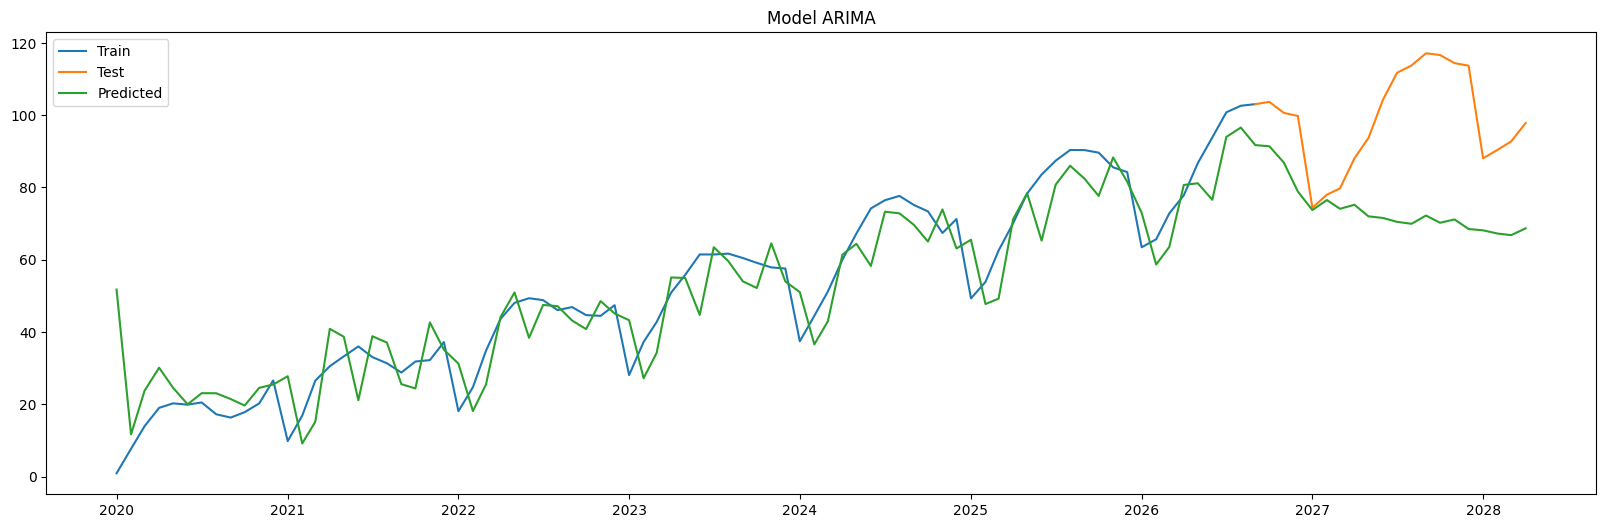

In [ ]:
# First, let's train ARIMA model
model_arima = ARIMA(train, 
                    order=(0, 0, 3),
                    seasonal_order=(1, 0, 1, 7)
).fit()

pred_model_arima = model_arima.predict(start=train_start, end=test_end)

plt.figure(figsize=(20, 6))
plt.plot(train)
plt.plot(test)
plt.plot(pred_model_arima)
plt.title('Model ARIMA')
plt.legend(['Train', 'Test', 'Predicted'])

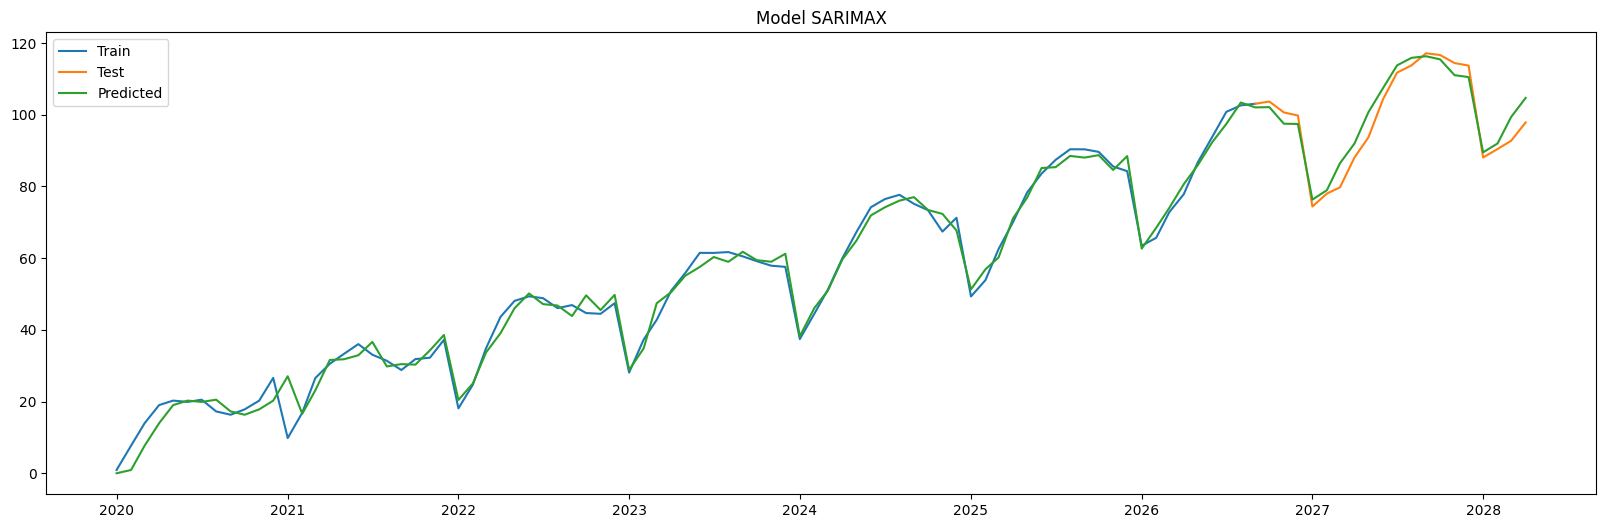

In [ ]:
# Now, let's train SARIMAX
model_sarimax = SARIMAX(train, 
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12)
).fit(disp=False)

pred_model_sarimax = model_sarimax.predict(start='2020-01-01', end='2028-04-01')

plt.figure(figsize=(20, 6))
plt.plot(train)
plt.plot(test)
plt.plot(pred_model_sarimax)
plt.title('Model SARIMAX')
plt.legend(['Train', 'Test', 'Predicted'])


## Example 2

Holt-Winters methods.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Create a sample time series with trend and seasonality
date_range = pd.date_range(start = '2020-01-01', periods = 48, freq = 'M')
data = 10 + 0.5 * np.arange(48) + 5 * np.sin(2 * np.pi * np.arange(48) / 12) + np.random.normal(0, 1, 48)
df = pd.DataFrame({
    'Date': date_range, 
    'Value': data
})
df.set_index('Date', inplace=True)
df['Type'] = 'Real'
df

C:\Users\Evgeni Zorin\AppData\Local\Temp\ipykernel_29768\874070761.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start = '2020-01-01', periods = 48, freq = 'M')


,Value,Type
Date,,
2020-01-31,10.003345,Real
2020-02-29,12.984252,Real
2020-03-31,16.494071,Real
2020-04-30,18.212886,Real
2020-05-31,17.272413,Real
2020-06-30,13.727654,Real
2020-07-31,13.523601,Real
2020-08-31,12.475205,Real
2020-09-30,12.039625,Real


<Axes: xlabel='Date', ylabel='Value'>

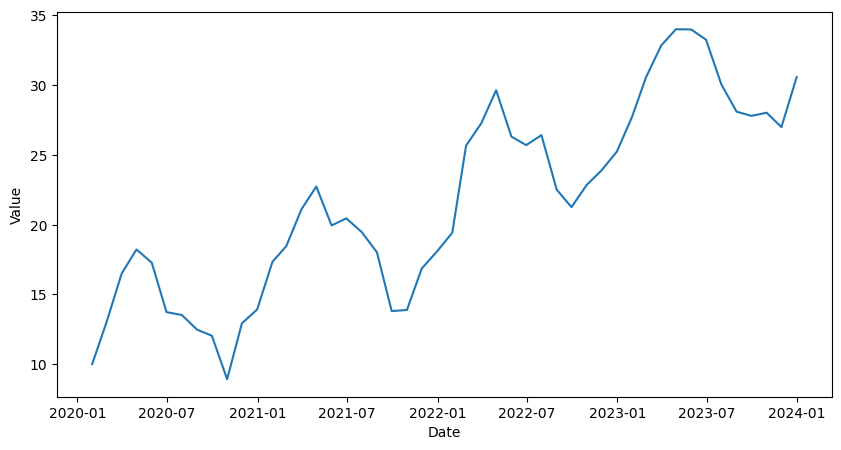

In [3]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x = df.index, 
    y = df['Value']
)

C:\Users\Evgeni Zorin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='None', ylabel='Value'>

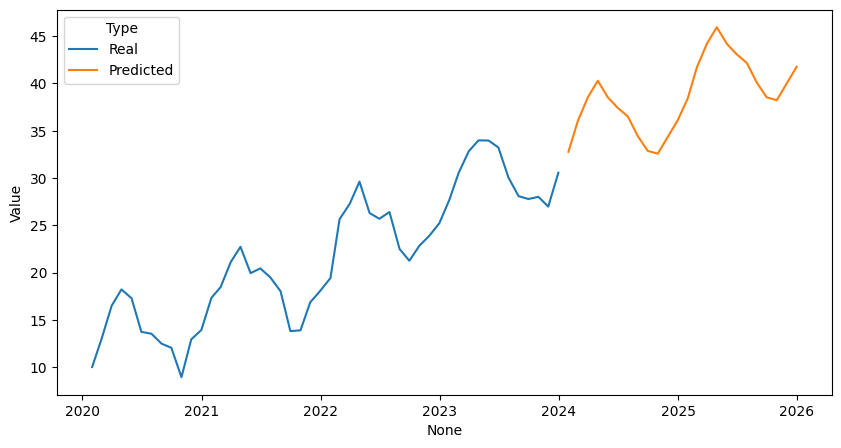

In [6]:
model = ExponentialSmoothing(
    df['Value'],
    trend = 'add',
    seasonal = 'add',
    seasonal_periods = 12
)
fit = model.fit()

# Forecast next 24 months
forecast = fit.forecast(24)
# Combine actual and forecast
forecast = forecast.to_frame(name = 'Value')
forecast['Type'] = 'Predicted'
combined = pd.concat(
    [df, forecast],
    axis = 'rows'
)
plt.figure(figsize=(10,5))
sns.lineplot(
    x = combined.index,
    y = combined['Value'],
    hue = combined['Type']
)
